# Music and the Brain 
---
__Anatomical image__ <br>
- sub-01_ses-01_T1 <br>
_"EchoTime"_ -> TE = 0.0035, <br>
_"RepetitionTime"_ -> TR = 2.53, <br>
<br>
- sub-01_ses-01_T2 <br>
_"EchoTime"_ -> TE = 0.408,, <br>
_"RepetitionTime"_ -> TR = 3.2, <br>


These are the imports that are going to be used throughout this code

### Importing packages

In [1]:
import os #to read the directories

import numpy as np
import pandas as pd

import nibabel as nib

import nilearn
from nilearn import plotting
from nilearn import image
from nilearn.plotting import plot_anat, plot_img, plot_stat_map


In [6]:
# Set the path to the data directory
src_dir = "../MusicBrainNetwork/data"
part_id = 'sub-02'
ses_id = 'ses-01'


In [7]:
Directory_AnatomicalImage= "../MusicBrainNetwork/data/sub-01/anat"
file_Anatomical = [file for file in os.listdir(Directory_AnatomicalImage) if file.endswith('.nii.gz')] #they have to be with .nii.gz
file_paths_anat = [os.path.join(Directory_AnatomicalImage, file_name) for file_name in file_Anatomical] # Creates full paths to the files


Directory_func = "../MusicBrainNetwork/data/sub-01/func"
file_func = [file for file in os.listdir(Directory_func) if file.endswith('.nii.gz')]
file_paths_func = [os.path.join(Directory_func, file_name) for file_name in file_func]
print(file_paths_func)


['../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-prepr

### 0.1 Anatomical Data

KeyboardInterrupt: 

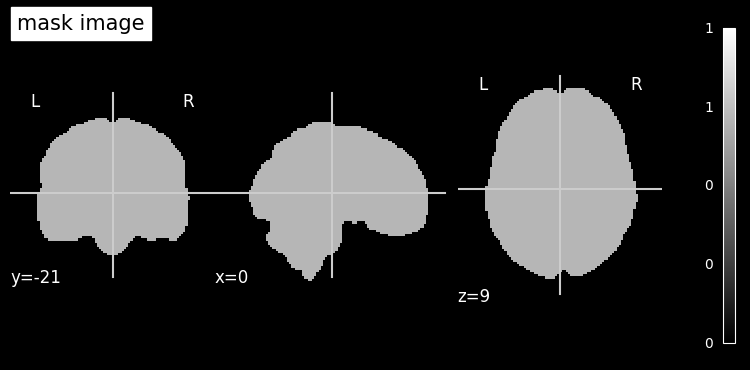

In [8]:
for file in file_paths_anat:
    try:
        image_info = file.split('_')[-1].split('.')[0] #Splits between the last _ and the .
        plot_anat(file, title=image_info + " image", colorbar=True, cbar_tick_format="%i")
        
    except Exception as e:
        print(f"An error occurred while loading the file: {file}")
        print(f"Error: {str(e)}")

plot_anat(file_paths_anat[1], title='T1w processed image', display_mode='ortho', dim=-1, draw_cross=False, annotate=False, cut_coords=(0, 0, 0))
        

### 0.1 Functional Data
__Functional images__ <br>
_"RepetitionTime"_ -> TR = 1, <br>

In [9]:
from nilearn.image import concat_imgs, mean_img

func_runs = [file for file in os.listdir(Directory_func) if file.endswith('bold.nii.gz')]

func_runs.sort()

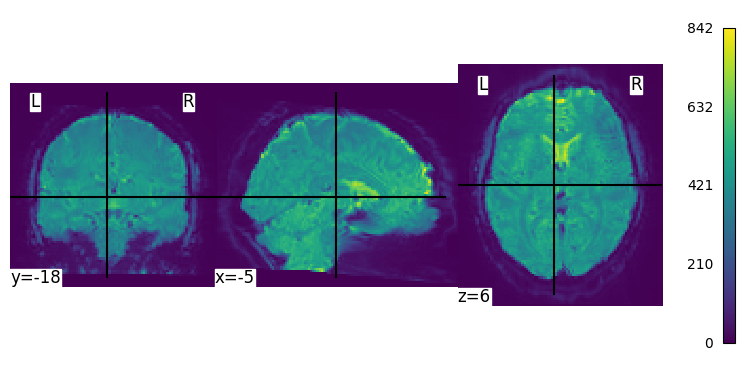

In [10]:
func_image = image.load_img(os.path.join(Directory_func, func_runs[0]))

mean_func_img = mean_img(func_image)

plot_img(mean_func_img, colorbar=True, cbar_tick_format="%i")

In [ ]:
# Concatenate the functional images
# fmri_img = concat_imgs(file_paths_func)

subject01_runs = {}
for i, file in enumerate(func_runs, start=1):
    
    subject01_runs[i] = file
    
print(subject01_runs)  
    


{1: 'sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 2: 'sub-01_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 3: 'sub-01_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 4: 'sub-01_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'}


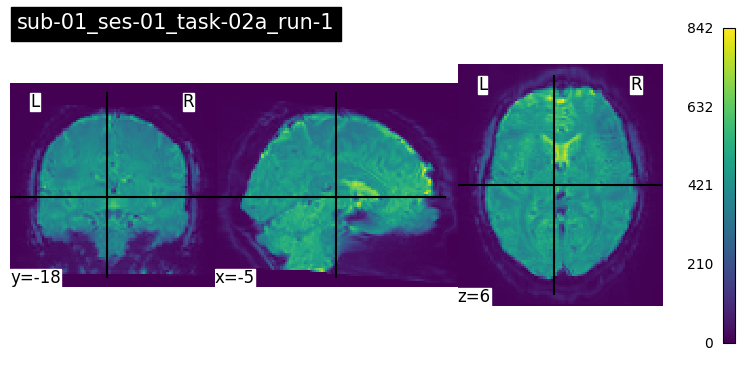

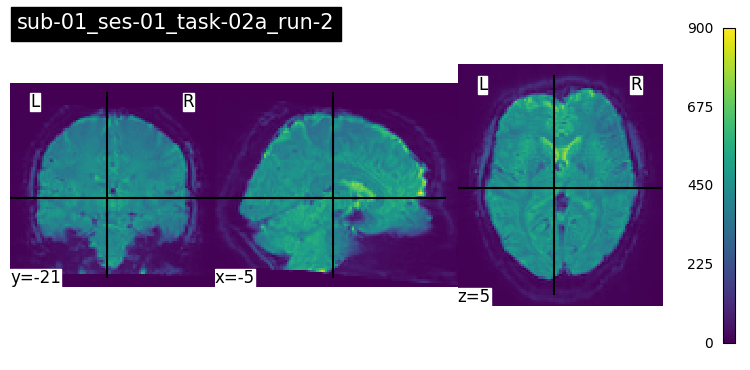

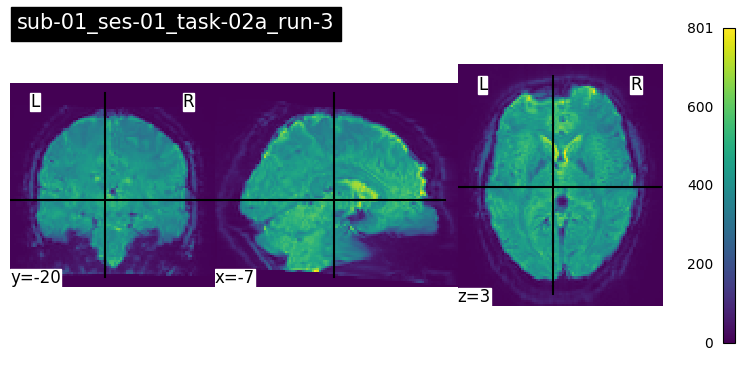

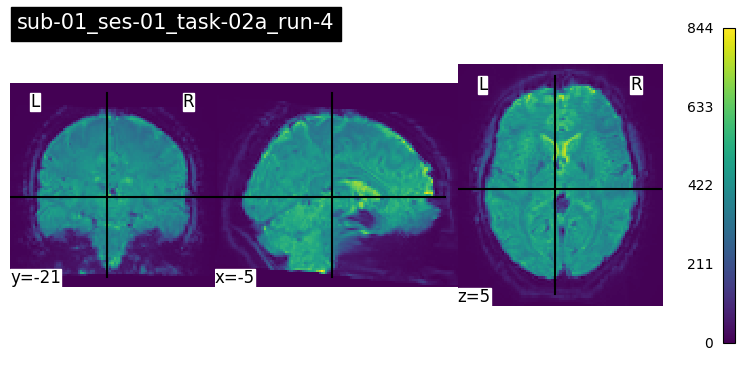

In [ ]:
mean_fmri_imgs = {}

import gc

for i, (key, file_path) in enumerate(subject01_runs.items(), start=1):
    # Carregar a imagem funcional
    func_image = image.load_img(os.path.join(Directory_func, file_path))

    # Extrair informações da imagem para o título
    image_info = '_'.join(os.path.basename(file_path).split('_')[:4])  # Extrai as primeiras 4 partes do nome do arquivo
    
    # Calcular a imagem média
    mean_fmri_img = mean_img(func_image)
    
    # Armazenar a imagem média no dicionário
    mean_fmri_imgs[key] = mean_fmri_img
    
    # Plotar a imagem média
    plot_img(mean_fmri_imgs[key], title=image_info, colorbar=True, cbar_tick_format="%i")
    
    # Limpar variáveis para liberar memória
    del func_image
    del mean_fmri_img
    gc.collect()  # Forçar coleta de lixo para liberar memória

#### 0.2.1 Table of Events

In [7]:
fdir_events = [file for file in os.listdir(Directory_func) if file.endswith('.tsv')]

f_events = [os.path.join(Directory_func, f) for f in fdir_events]

f_events.sort()

f_events

['../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-1_events.tsv',
 '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-2_events.tsv',
 '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-3_events.tsv',
 '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-4_events.tsv']

sub-01_ses-01_task-02a_run-1_events.tsv
sub-01_ses-01_task-02a_run-2_events.tsv
sub-01_ses-01_task-02a_run-3_events.tsv
sub-01_ses-01_task-02a_run-4_events.tsv


In [8]:

for fn in f_events:
    # Load the events.tsv file
    events = pd.read_table(fn)

    # Get the file name
    events_info = os.path.basename(fn)

    # Print the image information
    print(events_info) 
    
    # pd.read_table function is used to read a general delimited file into a pandas DataFrame
    print(events) 

sub-01_ses-01_task-02a_run-1_events.tsv
     onset  duration        trial_type
0     0.00     12.25             Noise
1    12.25     24.00        Tenderness
2    36.24      5.93             Noise
3    42.18     24.08        Tenderness
4    66.25     17.99             Noise
5    84.25     24.06            Wonder
6   108.30      5.98             Noise
7   114.28     23.97            Wonder
8   138.25     17.93             Noise
9   156.19     24.07         Nostalgia
10  180.26      6.37             Noise
11  186.62     23.63         Nostalgia
12  210.25     18.15             Noise
13  228.40     23.86      Peacefulness
14  252.26      5.94             Noise
15  258.20     24.07      Peacefulness
16  282.26     17.96             Noise
17  300.22     24.03     Transcendence
18  324.26      5.94             Noise
19  330.20     24.07     Transcendence
20  354.27     18.00             Noise
21  372.27     24.07           Sadness
22  396.33      5.99             Noise
23  402.32     24.01    

# 1 Creation of Input dataset and Target vectors 

In [ ]:
from nilearn.image import index_img 

run_id = 0

image_set = {}
target_set = {}
group_set = {}

idx = 0

offset_st = 4 # offset for the onset time
offset_end = 2 # offset for the end block time

# for each events file 
for fn in f_events:

    print(os.path.join(Directory_func,func_runs[run_id]), fn)
    
    # Load the events.tsv file
    events = pd.read_table(fn)

    # create one image per event 
    for i, row in events.iterrows():

        # Print the row information
        print(row) 

        # Extract the onset time
        onset = np.round(row['onset'])

        # Extract the duration
        duration = np.round(row['duration'])

        # Extract the trial_type
        trial_type = row['trial_type']

        # Print the row information
        print(onset, duration, trial_type) 

        # if duration greater than 10
        if duration > 10 and onset + duration + offset_end < 660:

            # array with onset to onset+duration
            i_idxs = np.arange(onset + offset_st, onset + duration + offset_end, 1, dtype=int)

            # create mean_img based on i_idxs
            mean_img_i = mean_img(index_img( 
                os.path.join(Directory_func,func_runs[run_id]), 
                i_idxs))

            image_set[idx] = mean_img_i
            target_set[idx] = trial_type
            group_set[idx] = run_id

            idx += 1


    run_id += 1



../MusicBrainNetwork/data/sub-01/func\sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz ../MusicBrainNetwork/data/sub-01/func\sub-01_ses-01_task-02a_run-1_events.tsv
onset           0.0
duration      12.25
trial_type    Noise
Name: 0, dtype: object
0.0 12.0 Noise
onset              12.25
duration            24.0
trial_type    Tenderness
Name: 1, dtype: object
12.0 24.0 Tenderness
onset         36.24
duration       5.93
trial_type    Noise
Name: 2, dtype: object
36.0 6.0 Noise
onset              42.18
duration           24.08
trial_type    Tenderness
Name: 3, dtype: object
42.0 24.0 Tenderness
onset         66.25
duration      17.99
trial_type    Noise
Name: 4, dtype: object
66.0 18.0 Noise
onset          84.25
duration       24.06
trial_type    Wonder
Name: 5, dtype: object
84.0 24.0 Wonder
onset         108.3
duration       5.98
trial_type    Noise
Name: 6, dtype: object
108.0 6.0 Noise
onset         114.28
duration       23.97
trial_type    Wonder


In [ ]:
# size/shape of the image_set
print('Image set size: '+ str(len(image_set)))

# size/shape of the target_set
print('Target vector: '+ str(len(target_set)))

# print unique values in target_set
labels = np.unique(list(target_set.values()))

# Converter para lista para reordenar
labels = list(labels)

# Colocar 'Noise' na primeira posição, se existir
if 'Noise' in labels:
    labels.remove('Noise')
    labels.insert(0, 'Noise')

print('Labels: ')
print(labels)
# size/shape of the group_set

print('Run group vector: '+ str(len(group_set)))




NameError: name 'image_set' is not defined

If the derivative file exists, pass to classification segment

In [ ]:
deriv_dir = os.path.join(src_dir, 'derivatives')

if not os.path.exists(deriv_dir):
    os.makedirs(deriv_dir)

# if the directory for the participant and session does not exist, create it
if not os.path.exists(os.path.join(deriv_dir, part_id, ses_id)):
    os.makedirs(os.path.join(deriv_dir, part_id, ses_id))

# concat images in list

#if 
X = nilearn.image.concat_imgs(list(image_set.values()))


# Save the image_set using nibabel.save and BIDS naming convention
nib.save(X, os.path.join(deriv_dir, part_id, ses_id, f'{part_id}_{ses_id}_task-02a_MVPA_12sBOLD.nii.gz'))

# Save the target_set using np.save
np.save(os.path.join(deriv_dir, part_id, ses_id, f'{part_id}_{ses_id}_task-02a_MVPA_12sBOLD_targets.npy'), target_set)

# Save the group_set using np.save
np.save(os.path.join(deriv_dir, part_id, ses_id, f'{part_id}_{ses_id}_task-02a_MVPA_12sBOLD_groups.npy'), group_set)



NameError: name 'image_set' is not defined

# 2. Classification

In [46]:
from nilearn.maskers import NiftiMasker
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

from nilearn.image import smooth_img

from nilearn.decoding import Decoder
# “background”: Use this option if your images present a clear homogeneous background.
# “whole-brain-template”: This will extract the whole-brain part of your data by resampling 
# the MNI152 brain mask for your data’s field of view.


logo = LeaveOneGroupOut()

### Creation of the Indeces' mean Images

In [47]:
values = np.repeat([0, 1, 2, 3], 27)

# Reshape the array to have 84 rows and 1 column
run_label= values.flatten()

print(run_label.shape)

(108,)


In [48]:
print(run_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Loading the saved set_dir

In [49]:
src_dir = "../MusicBrainNetwork/data"

# Diretório de derivados
deriv_dir = os.path.join(src_dir, 'derivatives')

# Identificadores de participante e sessão
# Construir o caminho completo para o diretório de eventos
events_dir = os.path.join(deriv_dir, part_id, ses_id)

# Listar todos os arquivos que terminam com 'targets.npy' no diretório de eventos
target_set_dir = [file for file in os.listdir(events_dir) if file.endswith('targets.npy')]
group_set_dir = [file for file in os.listdir(events_dir) if file.endswith('groups.npy')]
image_set_dir = [file for file in os.listdir(events_dir) if file.endswith('MVPA_12sBOLD.nii.gz')]

print(target_set_dir)
print(group_set_dir)
print(image_set_dir)

['sub-02_ses-01_task-02a_MVPA_12sBOLD_targets.npy']
['sub-02_ses-01_task-02a_MVPA_12sBOLD_groups.npy']
['sub-02_ses-01_task-02a_MVPA_12sBOLD.nii.gz']


In [50]:
for img_path in image_set_dir:
    # Carregar a imagem
    
    full_img_path = os.path.join(events_dir, img_path)
    
    ni_img = nib.load(full_img_path)
    
    # Acessar informações da imagem

    # Se você quiser acessar os dados da imagem como um array numpy
    X = ni_img


In [52]:
print(X)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (97, 115, 97, 108)
affine:
[[   2.     0.     0.   -96.5]
 [   0.     2.     0.  -132.5]
 [   0.     0.     2.   -78.5]
 [   0.     0.     0.     1. ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4  97 115  97 108   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 1341.6683
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unkn

## Masking the runs


In [51]:
c_func_runs = [os.path.join(Directory_func, f) for f in func_runs]
print(c_func_runs)

['../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '../MusicBrainNetwork/data/sub-01/func\\sub-01_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz']


In [16]:
from nilearn.masking import compute_epi_mask, compute_multi_epi_mask

mask_img = compute_multi_epi_mask(c_func_runs)

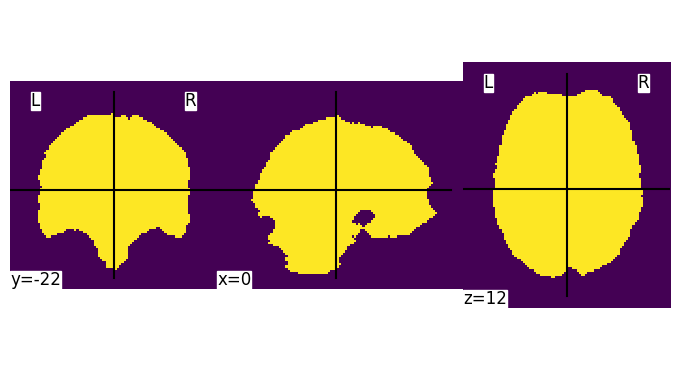

In [17]:
plot_img(mask_img)

### Preparing the fMRI data


In [53]:
masker = NiftiMasker(
    mask_img=mask_img,
    standardize="zscore_sample",
    runs= run_label,
    smoothing_fwhm = 3
    )
X_masked = masker.fit_transform(X)

In [54]:
svc_ovo = OneVsOneClassifier(
    Pipeline(
        [
            ("anova", SelectKBest(f_classif, k=500)),
            ("svc", SVC(kernel="linear")),
        ]
    )
)

In [ ]:
decoder_svcL1_background = Decoder(estimator='svc_l1', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='background', verbose = 0)
decoder_svcL1_whole_brain = Decoder(estimator='svc_l1', mask = mask_img, cv = logo, smoothing_fwhm=3,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_svcL1_gm = Decoder(estimator='svc_l1', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='gm-template', verbose = 0)

decoder_svcL2_background = Decoder(estimator='svc_l2', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='background', verbose = 0)
decoder_svcL2_whole_brain = Decoder(estimator='svc_l2', mask = mask_img, cv = logo, smoothing_fwhm=3,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_svcL2_gm = Decoder(estimator='svc_l2', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='gm-template', verbose =0 )

decoder_LogisticL1_background = Decoder(estimator='logistic_l1', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='background', verbose = 0)
decoder_LogisticL1_whole_brain = Decoder(estimator='logistic_l1', mask = mask_img, cv = logo, smoothing_fwhm=3,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_LogisticL1_gm = Decoder(estimator='logistic_l1', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='gm-template', verbose = 0)

decoder_LogisticL2_background = Decoder(estimator='logistic_l2', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='background', verbose = 0)
decoder_LogisticL2_whole_brain = Decoder(estimator='logistic_l2', mask = mask_img, cv = logo, smoothing_fwhm=3,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_LogisticL2_gm = Decoder(estimator='logistic_l2', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='gm-template', verbose = 0)

decoder_ridgeregressor_background = Decoder(estimator='ridge_regressor', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='background', verbose = 0)
decoder_ridgeregressor_whole_brain = Decoder(estimator='ridge_regressor', mask = mask_img, cv = logo, smoothing_fwhm=3,  mask_strategy='whole-brain-template',  verbose = 0)
decoder_ridgeregressor_gm = Decoder(estimator='ridge_regressor', mask = mask_img, cv = logo, smoothing_fwhm=3, mask_strategy='gm-template', verbose = 0)

In [55]:
#Labels
labels_dict = {
    1: 'JoyfulActivation',
    2: 'Noise',
    3: 'Nostalgia',
    4: 'Peacefulness',
    5: 'Power',
    6: 'Sadness',
    7: 'Tenderness',
    8: 'Tension',
    9: 'Transcendence',
    10: 'Wonder'
}

# Obter os rótulos únicos
labels = np.unique(list(labels_dict.values()))

# Converter para lista para reordenar
labels = list(labels)

# Colocar 'Noise' na primeira posição, se existir
if 'Noise' in labels:
    labels.remove('Noise')
    labels.insert(0, 'Noise')

print(labels)


['Noise', 'JoyfulActivation', 'Nostalgia', 'Peacefulness', 'Power', 'Sadness', 'Tenderness', 'Tension', 'Transcendence', 'Wonder']


In [56]:
target_file_path = os.path.join(events_dir, target_set_dir[0])

# Loas the saved values in archive .npy with allow_pickle=True
target_values = np.load(target_file_path, allow_pickle=True)

target_values = np.atleast_1d(target_values)

# transform the target_set unique strings to integers
from sklearn.preprocessing import LabelEncoder

extracted_values = []

for d in target_values:
    extracted_values.extend(d.values())
    
target_values = np.array(extracted_values)

le = LabelEncoder()
le.fit(labels)
y = le.transform(target_values)

#this had to be done in order to Noise to be the first label, with the value 0, and then JoyfulActivation to be the second label, with the value 1,...
y = np.where(y == 1, -1, y)  
y = np.where(y == 0, 1, y)  
y = np.where(y == -1, 0, y)  



In [57]:
runs_group = list(run_label)

# unique values in runs_group
print(np.unique(runs_group))

[0 1 2 3]


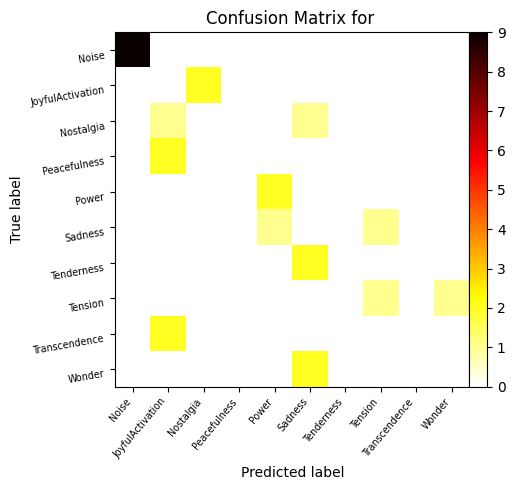

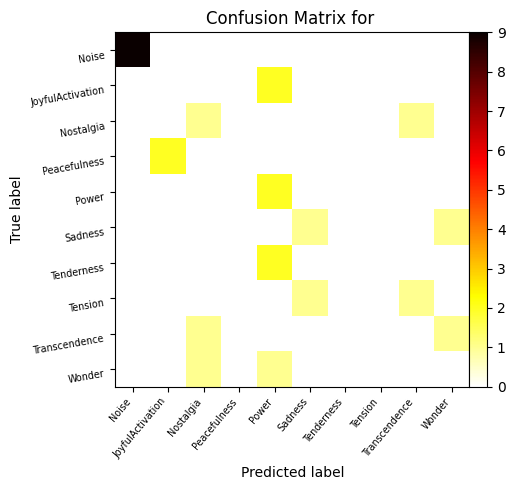

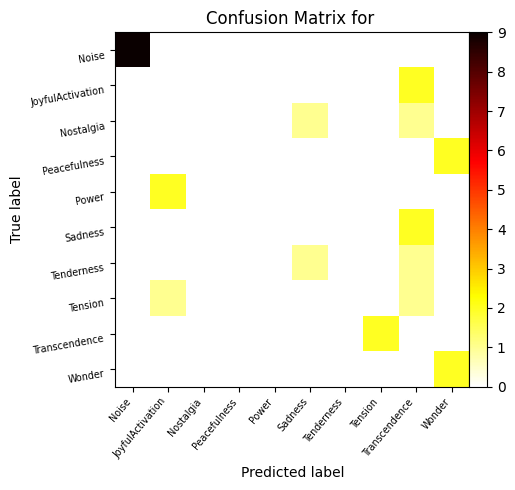

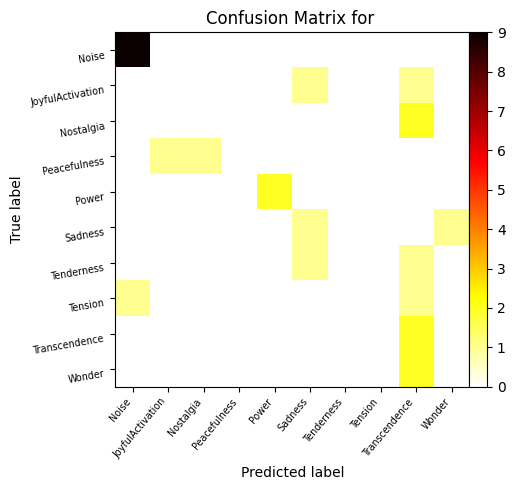

In [ ]:
from sklearn.metrics import confusion_matrix
accuracy_scores = []
predictions = []
for train_index, test_index in logo.split(X_masked, y, groups = runs_group):
    
    X_train, X_test = X_masked[train_index], X_masked[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc_ovo.fit(X_train, y_train)
    
    y_pred = svc_ovo.predict(X_test)
    predictions.append(y_pred)

    accuracy = (y_pred == y_test).mean() * 100
    accuracy_scores.append(accuracy)

    matrix = confusion_matrix(y_test, y_pred, normalize = None)
    
    # Plotar a matriz de confusão
    im = plotting.plot_matrix(
        matrix,
        labels=labels,
        vmin=0,
        cmap="hot_r",
    )
    
    # Adicionar rótulos aos eixos x/y
    ax = im.axes
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.set_title(f"Confusion Matrix for ")
    
    # Ajustar a figura para que os rótulos se encaixem
    ax.get_figure().tight_layout()
    
    # Exibir a matriz de confusão
    plotting.show()
    
    
    
    
    


In [68]:
print(accuracy_scores)
print(predictions)

[44.44444444444444, 48.148148148148145, 40.74074074074074, 51.85185185185185]
[array([0, 5, 5, 0, 5, 5, 0, 5, 1, 0, 1, 1, 0, 1, 1, 0, 7, 4, 0, 4, 4, 0,
       7, 9, 0, 2, 2]), array([0, 9, 2, 0, 5, 9, 0, 5, 8, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 2, 0,
       2, 8, 0, 1, 1]), array([0, 8, 8, 0, 8, 8, 0, 8, 5, 0, 8, 1, 0, 1, 1, 0, 8, 5, 0, 9, 9, 0,
       9, 9, 0, 7, 7]), array([0, 5, 9, 0, 2, 1, 0, 8, 8, 0, 8, 5, 0, 8, 8, 0, 5, 8, 0, 4, 4, 0,
       8, 8, 0, 8, 0])]


### Confusion matrix

In [22]:
decoder_random = Decoder(
    estimator='svc', 
    cv = logo, 
    smoothing_fwhm = 3,  
    mask = mask_img,
    standardize="zscore_sample",)

decoder_random.fit(
    X, 
    y, 
    groups = runs_group)

# get values of decoder_LogisticL1.cv_scores_ per fold and create list
cv_scores_random = [decoder_random.cv_scores_[i] for i in range(len(decoder_random.cv_scores_))]

y_pred_random = decoder_random.predict(X)

# mean of cv_scores per class
cv_scores_mean_random = np.mean(cv_scores_random, axis=1)

print(cv_scores_mean_random)

[0.99845679 0.515      0.795      0.77       0.865      0.755
 0.99       0.785      0.58       0.805     ]


In [24]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=4)

cv_fold_scores = []
predictions = []

accuracy_scores_mean  =[]
accuracy_scores = []

for train, test in cv.split(runs_group):
    y_train = np.array(y)[train]
    y_test = np.array(y)[test]
    
    decoder_kfold.fit(index_img(X, train), y_train)
    y_pred = decoder_kfold.predict(index_img(X, test))
    predictions.append(y_pred)
    
    accuracy = (y_pred == y_test).mean() * 100.0
    accuracy_scores.append(y_pred == y_test)
    accuracy_scores_mean.append(np.mean(y_pred == y_test))




NameError: name 'index_img' is not defined

In [ ]:
print("Predictions: ")
print(predictions)
print("Accuracy: ")
print(accuracy)
print("Accuracy Scores: ")
print(accuracy_scores)
print("Accuracy Scores Mean: ")
print(accuracy_scores_mean)

Predictions: 
[array([5, 5, 5, 0, 5, 5, 0, 5, 5, 0, 5, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       0, 6, 0, 4, 4]), array([0, 0, 0, 0, 0, 2, 0, 6, 0, 0, 1, 7, 0, 4, 4, 0, 4, 4, 0, 7, 1, 0,
       3, 6, 0, 3, 3]), array([0, 5, 4, 0, 1, 0, 0, 3, 6, 0, 0, 0, 0, 2, 1, 0, 2, 5, 0, 9, 9, 0,
       3, 4, 0, 9, 9]), array([0, 5, 5, 0, 2, 3, 0, 0, 3, 0, 6, 6, 0, 4, 9, 0, 8, 0, 0, 3, 4, 0,
       9, 1, 0, 0, 0])]
Accuracy: 
59.25925925925925
Accuracy Scores: 
[array([False, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False, False]), array([ True, False, False,  True, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True,  True]), array([ True,  True, False,  True,  True, False,  True, False,  True,
        True, False, False,  True, False, False,  True,

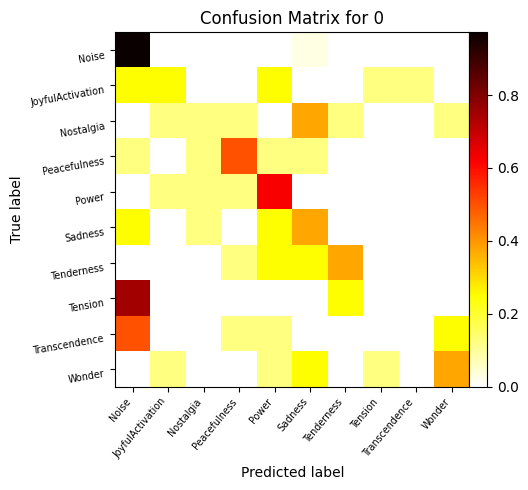

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
import time
cv_dictionary = {}

t0 = time.time()
decoder_ridgeregressor_gm.fit(X, y, run_label)
cv_dictionary["decoder_ridgeregressor_gm"]={"score":decoder_ridgeregressor_gm.cv_scores_}

scores = cv_dictionary["decoder_ridgeregressor_gm"]["score"]

print(f"{'decoder_ridgeregressor_gm':10}: {time.time() - t0:.2f}s")
for category in labels:
    category_idx = label_to_int[category]
    
    # Use the integer index to access the scores
    mean = np.mean(cv_dictionary['decoder_ridgeregressor_gm']['score'][category_idx])
    std = np.std(cv_dictionary['decoder_ridgeregressor_gm']['score'][category_idx])
    print(f"    {category:10} vs all -- AUC: {mean:1.2f} +- {std:1.2f}")

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


decoder_ridgeregressor_gm: 7.65s
    Noise      vs all -- AUC: 0.80 +- 0.07
    JoyfulActivation vs all -- AUC: 0.54 +- 0.16
    Nostalgia  vs all -- AUC: 0.40 +- 0.20
    Peacefulness vs all -- AUC: 0.51 +- 0.19
    Power      vs all -- AUC: 0.85 +- 0.11
    Sadness    vs all -- AUC: 0.87 +- 0.04
    Tenderness vs all -- AUC: 0.64 +- 0.32
    Tension    vs all -- AUC: 0.40 +- 0.03
    Transcendence vs all -- AUC: 0.22 +- 0.12
    Wonder     vs all -- AUC: 0.76 +- 0.02


In [ ]:
print(label_to_int)
print(cv_dictionary['decoder_ridgeregressor_gm']['score'].keys())

{'Noise': 0, 'JoyfulActivation': 1, 'Nostalgia': 2, 'Peacefulness': 3, 'Power': 4, 'Sadness': 5, 'Tenderness': 6, 'Tension': 7, 'Transcendence': 8, 'Wonder': 9}
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
y_matrix = 

In [ ]:
import time

classifiers = [
    decoder_dummy_gm,
    decoder_svcL1_gm,
    decoder_svcL2_gm,
    decoder_LogisticL1_gm,
    decoder_LogisticL2_gm,
    decoder_ridgeregressor_gm
]

# Nomes dos classificadores para exibição
classifier_names = [
    "decoder_dummy_gm",
    "decoder_svcL1_gm",
    "decoder_svcL2_gm",
    "decoder_LogisticL1_gm",
    "decoder_LogisticL2_gm",
    "decoder_ridgeregressor_gm"
]

predictions = {}
cv_dictionary = {}

# Ajuste, predição e cálculo da acurácia para cada classificador
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X, y, run_label)
    y_pred = classifier.predict(X)
    
    t0 = time.time()

    
    cv_dictionary[name] = {"score":classifier.cv_scores_}
    

    

    predictions[name] = y_pred
    accuracy = (y_pred == y).mean() * 100.0
    print(f"{name} classification accuracy: {accuracy:g}%")

    print(f"{name:25}: {time.time() - t0:.2f}s")

    for category in labels:

        category_idx = label_to_int[category]
    
        # Use the integer index to access the scores
        mean = np.mean(cv_dictionary[name]['score'][category_idx])
        std = np.std(cv_dictionary[name]['score'][category_idx])
        print(f"    {category:18} vs all -- AUC: {mean:1.2f} +- {std:1.2f}")

    scores = cv_dictionary[name]["score"]
    scores["AVERAGE"] = np.mean(list(scores.values()), axis=0)
    cv_dictionary[name]["score"] = scores
    if name == "decoder_dummy_gm":
        continue
    else:
        cv_dictionary[name]["map"] = classifier.coef_img_

    
    
    

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


decoder_dummy_gm classification accuracy: 21.4286%
decoder_dummy_gm         : 0.00s
    Noise              vs all -- AUC: 0.37 +- 0.00
    JoyfulActivation   vs all -- AUC: 0.44 +- 0.00
    Nostalgia          vs all -- AUC: 0.44 +- 0.00
    Peacefulness       vs all -- AUC: 0.44 +- 0.00
    Power              vs all -- AUC: 0.53 +- 0.13
    Sadness            vs all -- AUC: 0.44 +- 0.00
    Tenderness         vs all -- AUC: 0.53 +- 0.13
    Tension            vs all -- AUC: 0.53 +- 0.13
    Transcendence      vs all -- AUC: 0.53 +- 0.13
    Wonder             vs all -- AUC: 0.62 +- 0.13


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to

decoder_svcL1_gm classification accuracy: 100%
decoder_svcL1_gm         : 0.00s
    Noise              vs all -- AUC: 0.80 +- 0.04
    JoyfulActivation   vs all -- AUC: 0.61 +- 0.16
    Nostalgia          vs all -- AUC: 0.58 +- 0.28
    Peacefulness       vs all -- AUC: 0.43 +- 0.10
    Power              vs all -- AUC: 0.83 +- 0.07
    Sadness            vs all -- AUC: 0.94 +- 0.02
    Tenderness         vs all -- AUC: 0.87 +- 0.01
    Tension            vs all -- AUC: 0.84 +- 0.12
    Transcendence      vs all -- AUC: 0.34 +- 0.21
    Wonder             vs all -- AUC: 0.55 +- 0.36


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


decoder_svcL2_gm classification accuracy: 100%
decoder_svcL2_gm         : 0.00s
    Noise              vs all -- AUC: 0.77 +- 0.07
    JoyfulActivation   vs all -- AUC: 0.54 +- 0.17
    Nostalgia          vs all -- AUC: 0.33 +- 0.10
    Peacefulness       vs all -- AUC: 0.19 +- 0.07
    Power              vs all -- AUC: 0.92 +- 0.06
    Sadness            vs all -- AUC: 0.94 +- 0.02
    Tenderness         vs all -- AUC: 0.75 +- 0.25
    Tension            vs all -- AUC: 0.62 +- 0.24
    Transcendence      vs all -- AUC: 0.12 +- 0.07
    Wonder             vs all -- AUC: 0.76 +- 0.09


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selectio

decoder_LogisticL1_gm classification accuracy: 41.6667%
decoder_LogisticL1_gm    : 0.00s
    Noise              vs all -- AUC: 0.78 +- 0.08
    JoyfulActivation   vs all -- AUC: 0.00 +- 0.00
    Nostalgia          vs all -- AUC: 0.00 +- 0.00
    Peacefulness       vs all -- AUC: 0.00 +- 0.00
    Power              vs all -- AUC: 0.00 +- 0.00
    Sadness            vs all -- AUC: 0.00 +- 0.00
    Tenderness         vs all -- AUC: 0.00 +- 0.00
    Tension            vs all -- AUC: 0.00 +- 0.00
    Transcendence      vs all -- AUC: 0.00 +- 0.00
    Wonder             vs all -- AUC: 0.00 +- 0.00


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\model_selectio

decoder_LogisticL2_gm classification accuracy: 48.8095%
decoder_LogisticL2_gm    : 0.00s
    Noise              vs all -- AUC: 0.76 +- 0.05
    JoyfulActivation   vs all -- AUC: 0.58 +- 0.18
    Nostalgia          vs all -- AUC: 0.36 +- 0.14
    Peacefulness       vs all -- AUC: 0.19 +- 0.09
    Power              vs all -- AUC: 0.90 +- 0.06
    Sadness            vs all -- AUC: 0.91 +- 0.03
    Tenderness         vs all -- AUC: 0.72 +- 0.23
    Tension            vs all -- AUC: 0.72 +- 0.11
    Transcendence      vs all -- AUC: 0.10 +- 0.03
    Wonder             vs all -- AUC: 0.69 +- 0.11


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


decoder_ridgeregressor_gm classification accuracy: 88.0952%
decoder_ridgeregressor_gm: 0.00s
    Noise              vs all -- AUC: 0.80 +- 0.07
    JoyfulActivation   vs all -- AUC: 0.54 +- 0.16
    Nostalgia          vs all -- AUC: 0.40 +- 0.20
    Peacefulness       vs all -- AUC: 0.51 +- 0.19
    Power              vs all -- AUC: 0.85 +- 0.11
    Sadness            vs all -- AUC: 0.87 +- 0.04
    Tenderness         vs all -- AUC: 0.64 +- 0.32
    Tension            vs all -- AUC: 0.40 +- 0.03
    Transcendence      vs all -- AUC: 0.22 +- 0.12
    Wonder             vs all -- AUC: 0.76 +- 0.02


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


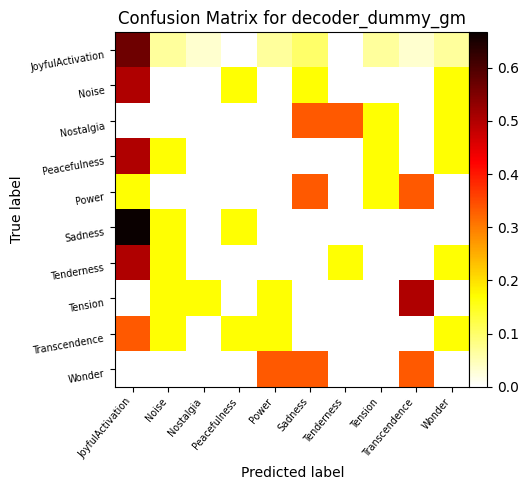

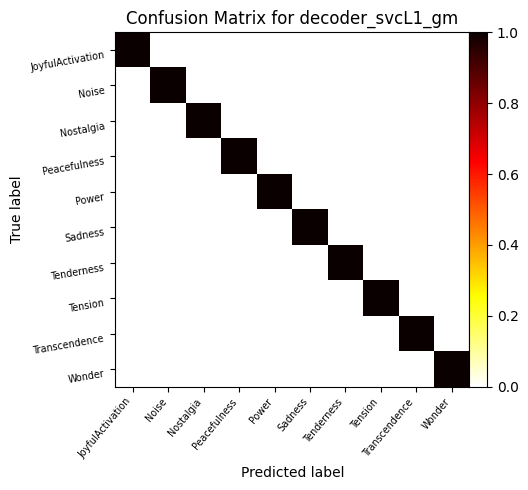

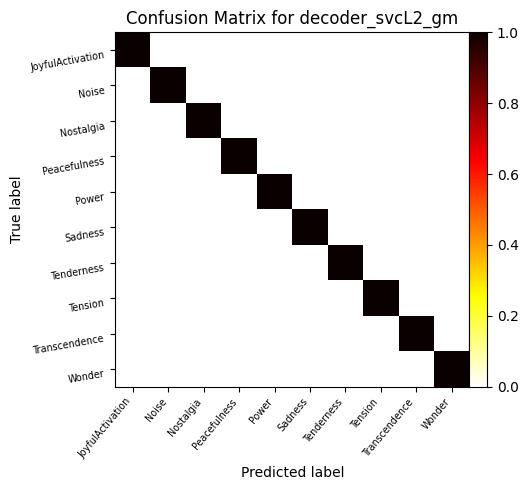

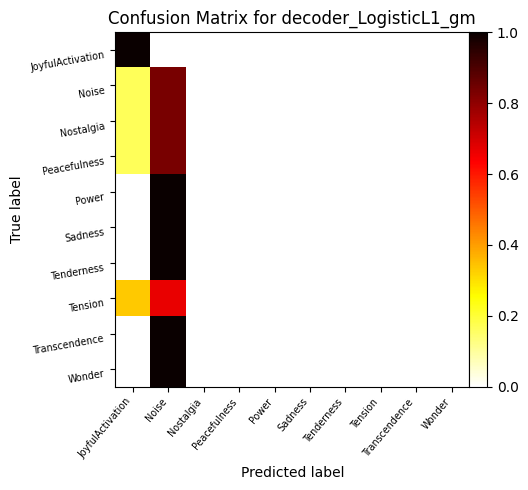

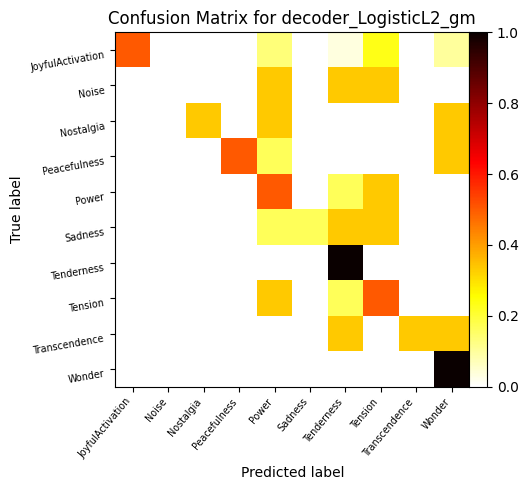

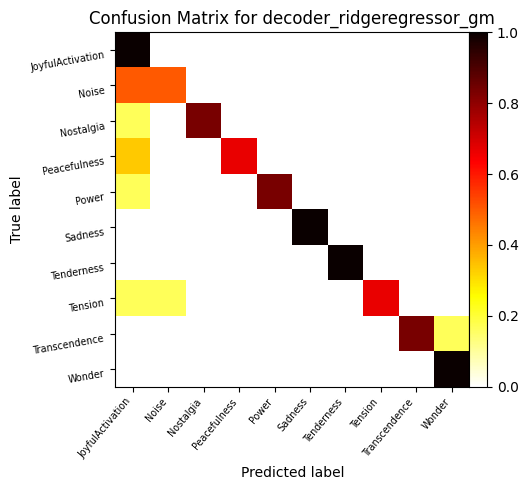

In [ ]:
from sklearn.metrics import confusion_matrix

for name in classifier_names:
    y_pred = predictions[name]
    
    # Calcular a matriz de confusão
    matrix = confusion_matrix(y, y_pred, normalize="true")
    
    # Plotar a matriz de confusão
    im = plotting.plot_matrix(
        matrix,
        labels=sorted(np.unique(labels)),
        vmin=0,
        cmap="hot_r",
    )
    
    # Adicionar rótulos aos eixos x/y
    ax = im.axes
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.set_title(f"Confusion Matrix for {name}")
    
    # Ajustar a figura para que os rótulos se encaixem
    ax.get_figure().tight_layout()
    
    # Exibir a matriz de confusão
    plotting.show()

In [ ]:
# for category in labels:

#         category_idx = label_to_int[category]
    
#         # Use the integer index to access the scores
#         mean = np.mean(cv_dictionary[name]['score'][category_idx])
#         std = np.std(cv_dictionary[name]['score'][category_idx])
#         print(f"    {category:118} vs all -- AUC: {mean:1.2f} +- {std:1.2f}")

#     scores = cv_dictionary[name]["score"]
#     scores["AVERAGE"] = np.mean(list(scores.values()), axis=0)
#     cv_dictionary[name]["score"] = scores

In [ ]:
all_categories = list(label_to_int.values()) + ["AVERAGE"]

print(all_categories)

# Acessar cada categoria individualmente
for category in all_categories:
    if category in cv_dictionary["decoder_dummy_gm"]["score"]:
        print(f"Category {category}: {cv_dictionary['decoder_dummy_gm']['score'][category]}")
    else:
        print(f"Category {category} not found in cv_dictionary['decoder_dummy_gm']['score']")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'AVERAGE']
Category 0: [0.3722222222222222, 0.3722222222222222, 0.3722222222222222]
Category 1: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923]
Category 2: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923]
Category 3: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923]
Category 4: [0.4423076923076923, 0.4423076923076923, 0.7115384615384616]
Category 5: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923]
Category 6: [0.4423076923076923, 0.7115384615384616, 0.4423076923076923]
Category 7: [0.7115384615384616, 0.4423076923076923, 0.4423076923076923]
Category 8: [0.4423076923076923, 0.4423076923076923, 0.7115384615384616]
Category 9: [0.7115384615384616, 0.7115384615384616, 0.4423076923076923]
Category AVERAGE: [0.4891453 0.4891453 0.4891453]


[0.3722222222222222, 0.4423076923076923, 0.4423076923076923, 0.4423076923076923, 0.532051282051282, 0.4423076923076923, 0.532051282051282, 0.532051282051282, 0.532051282051282, 0.6217948717948718, 0.4891452991452992]
[0.7981481481481483, 0.608974358974359, 0.576923076923077, 0.42948717948717946, 0.826923076923077, 0.9358974358974358, 0.8717948717948718, 0.8397435897435898, 0.3397435897435897, 0.5512820512820513, 0.6778917378917378]
[0.7703703703703703, 0.5384615384615384, 0.3333333333333333, 0.1923076923076923, 0.9166666666666666, 0.9358974358974358, 0.75, 0.6217948717948718, 0.12179487179487176, 0.7564102564102564, 0.5937037037037037]
[0.7833333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07833333333333332]
[0.7555555555555555, 0.5833333333333334, 0.358974358974359, 0.1858974358974359, 0.8974358974358975, 0.9102564102564102, 0.7243589743589743, 0.717948717948718, 0.09615384615384613, 0.6923076923076922, 0.5922222222222221]
[0.7981481481481482, 0.5448717948717948, 0.397435

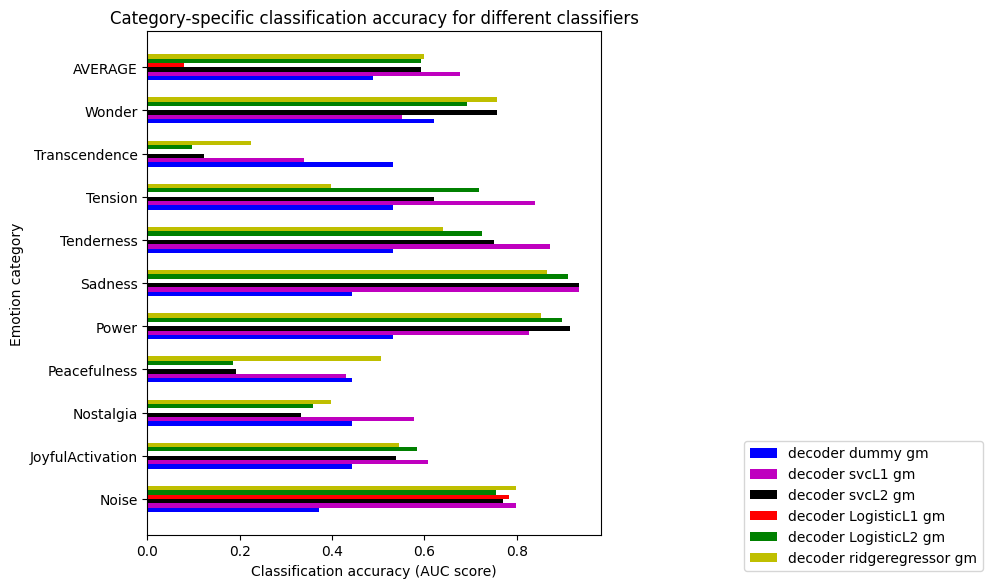

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Create a list with category indices and the string 'AVERAGE'
all_categories = list(label_to_int.values()) + ["AVERAGE"]

tick_position = np.arange(len(all_categories))
plt.yticks(tick_position + 0.25, list(label_to_int.keys()) + ["AVERAGE"])
height = 0.1

for color, name in zip(["b", "m", "k", "r", "g", "y"], classifier_names):
    
    


    score_means = [
        np.mean(cv_dictionary[name]["score"][category])
        for category in all_categories
    ]
    

    # Calculate scores for each category, except for 'AVERAGE'
    # for category in list(label_to_int.values()):
    #     score_means.append(np.mean(cv_dictionary[name]["score"][category]))
    #     print(category)
    print(score_means)
   

    # Manually compute the 'AVERAGE' score and append it
   
    # Plot the bars
    plt.barh(
        tick_position,
        score_means,
        label=name.replace("_", " "),
        height=height,
        color=color,
    )
    tick_position = tick_position + height

print(score_means)
plt.xlabel("Classification accuracy (AUC score)")
plt.ylabel("Emotion category")
plt.xlim(xmin=0.0)
plt.legend(ncol=1, bbox_to_anchor=(1.3, 0.2))
plt.title("Category-specific classification accuracy for different classifiers")
plt.tight_layout()

## Visualizing the Brain map of the Classifiers

In [ ]:
print(cv_dictionary)
print(classifier_names[1:6])
print(sorted(classifier_names))
print(labels[0])

{'decoder_dummy_gm': {'score': {0: [0.3722222222222222, 0.3722222222222222, 0.3722222222222222], 1: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923], 2: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923], 3: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923], 4: [0.4423076923076923, 0.4423076923076923, 0.7115384615384616], 5: [0.4423076923076923, 0.4423076923076923, 0.4423076923076923], 6: [0.4423076923076923, 0.7115384615384616, 0.4423076923076923], 7: [0.7115384615384616, 0.4423076923076923, 0.4423076923076923], 8: [0.4423076923076923, 0.4423076923076923, 0.7115384615384616], 9: [0.7115384615384616, 0.7115384615384616, 0.4423076923076923], 'AVERAGE': array([0.4891453, 0.4891453, 0.4891453])}}, 'decoder_svcL1_gm': {'score': {0: [0.7555555555555556, 0.7888888888888889, 0.8500000000000001], 1: [0.7307692307692308, 0.7115384615384616, 0.38461538461538464], 2: [0.2115384615384615, 0.6153846153846154, 0.9038461538461539], 3: [0.3653846153846154, 0.3461538461

Processing key 0 for classifier decoder_svcL1_gm
Processing key 1 for classifier decoder_svcL1_gm
Processing key 2 for classifier decoder_svcL1_gm
Processing key 3 for classifier decoder_svcL1_gm
Processing key 4 for classifier decoder_svcL1_gm
Processing key 5 for classifier decoder_svcL1_gm
Processing key 6 for classifier decoder_svcL1_gm
Processing key 7 for classifier decoder_svcL1_gm
Processing key 8 for classifier decoder_svcL1_gm
Processing key 9 for classifier decoder_svcL1_gm
Processing key 0 for classifier decoder_svcL2_gm
Processing key 1 for classifier decoder_svcL2_gm
Processing key 2 for classifier decoder_svcL2_gm
Processing key 3 for classifier decoder_svcL2_gm
Processing key 4 for classifier decoder_svcL2_gm
Processing key 5 for classifier decoder_svcL2_gm
Processing key 6 for classifier decoder_svcL2_gm
Processing key 7 for classifier decoder_svcL2_gm
Processing key 8 for classifier decoder_svcL2_gm
Processing key 9 for classifier decoder_svcL2_gm
Processing key 0 for

C:\Users\sebas\AppData\Local\Temp\ipykernel_23428\3509068708.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure=plt.figure(figsize=(3, 4)),


Processing key 1 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 2 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 3 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 4 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 5 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 6 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 7 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 8 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 9 for classifier decoder_LogisticL1_gm


c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\plotting\displays\_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Processing key 0 for classifier decoder_LogisticL2_gm
Processing key 1 for classifier decoder_LogisticL2_gm
Processing key 2 for classifier decoder_LogisticL2_gm
Processing key 3 for classifier decoder_LogisticL2_gm
Processing key 4 for classifier decoder_LogisticL2_gm
Processing key 5 for classifier decoder_LogisticL2_gm
Processing key 6 for classifier decoder_LogisticL2_gm
Processing key 7 for classifier decoder_LogisticL2_gm
Processing key 8 for classifier decoder_LogisticL2_gm
Processing key 9 for classifier decoder_LogisticL2_gm
Processing key 0 for classifier decoder_ridgeregressor_gm
Processing key 1 for classifier decoder_ridgeregressor_gm
Processing key 2 for classifier decoder_ridgeregressor_gm
Processing key 3 for classifier decoder_ridgeregressor_gm
Processing key 4 for classifier decoder_ridgeregressor_gm
Processing key 5 for classifier decoder_ridgeregressor_gm
Processing key 6 for classifier decoder_ridgeregressor_gm
Processing key 7 for classifier decoder_ridgeregressor

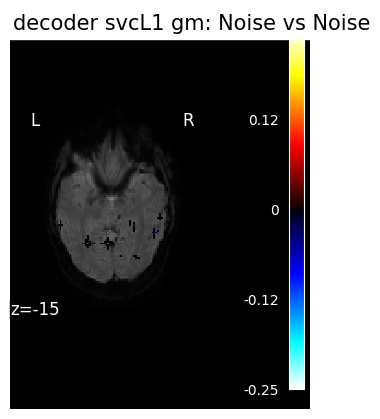

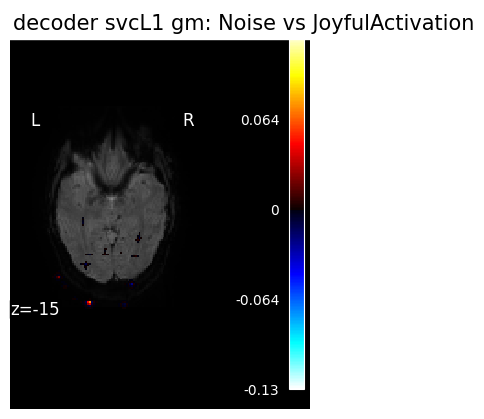

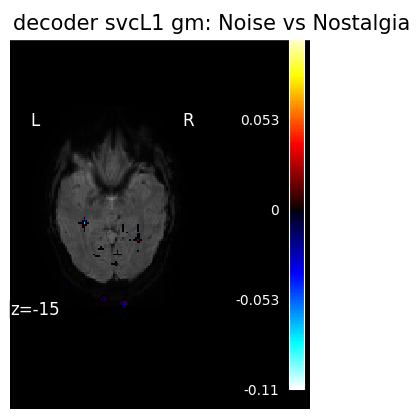

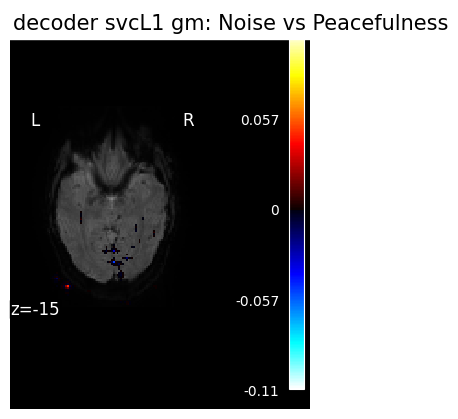

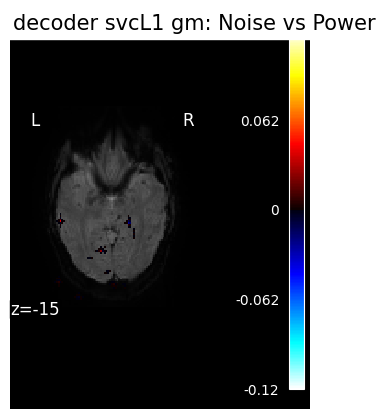

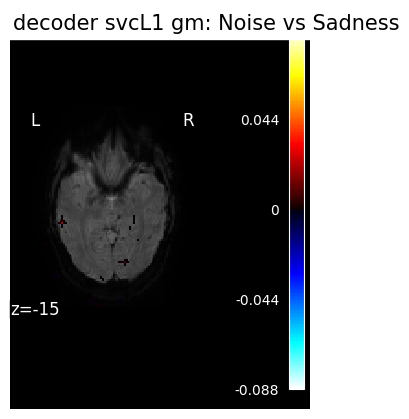

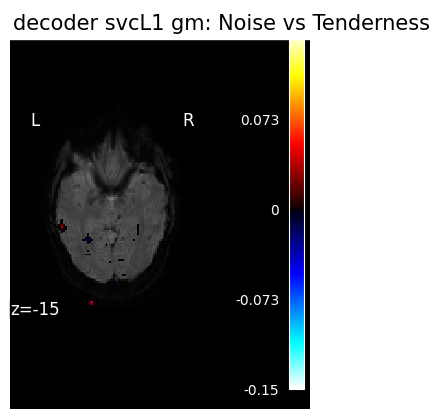

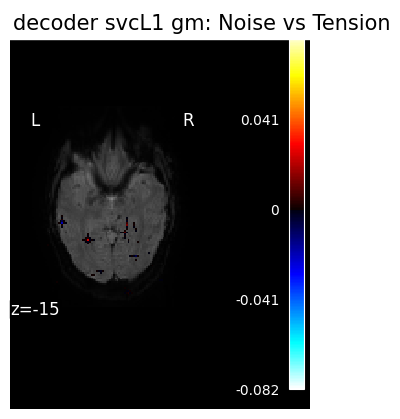

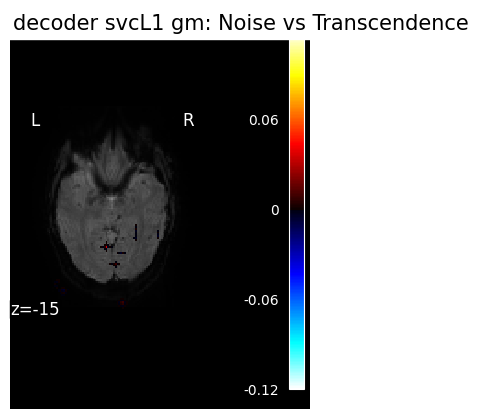

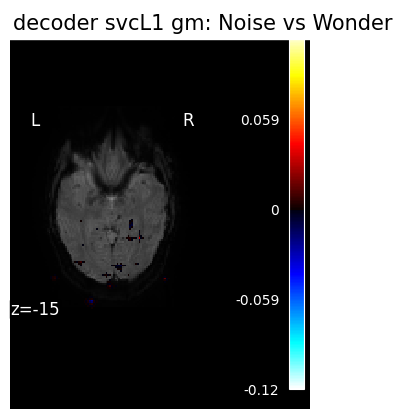

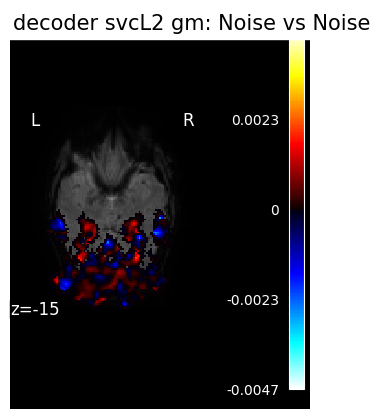

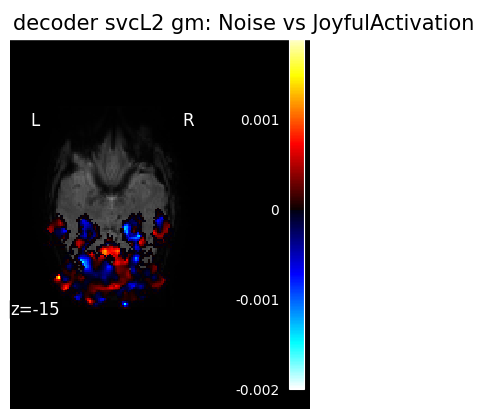

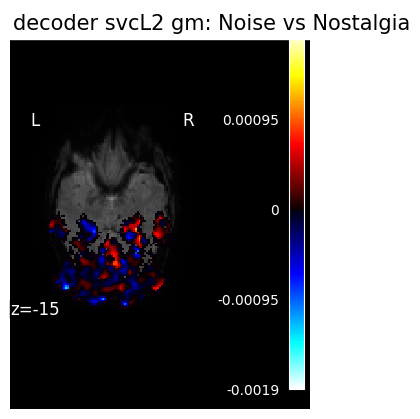

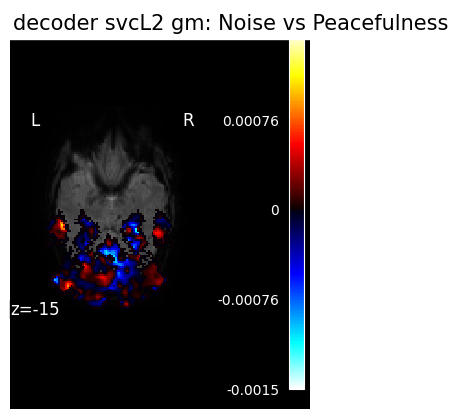

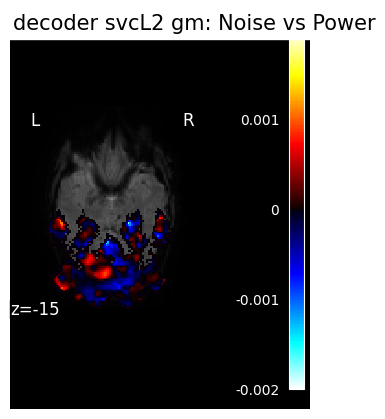

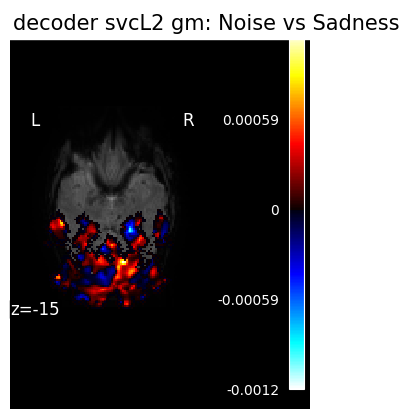

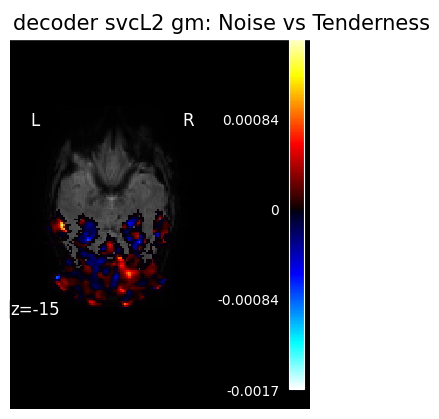

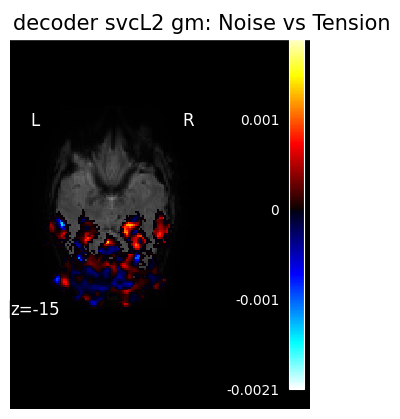

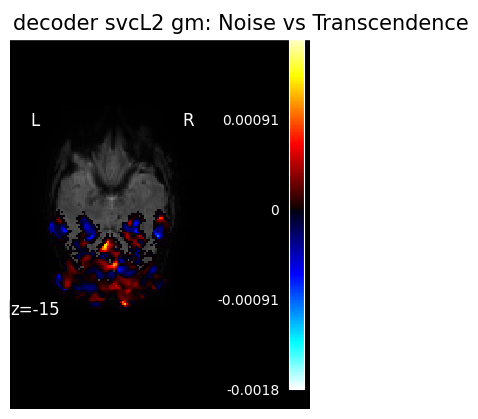

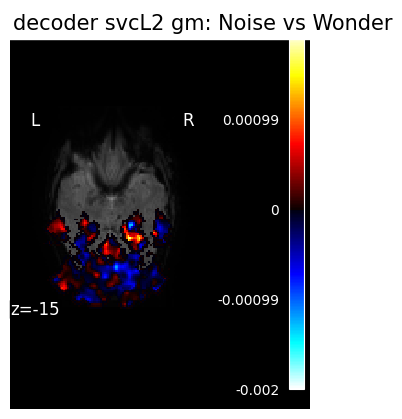

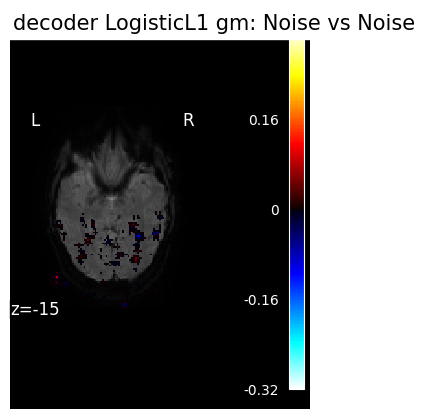

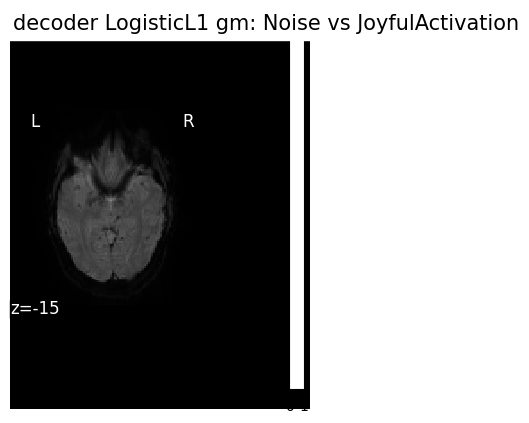

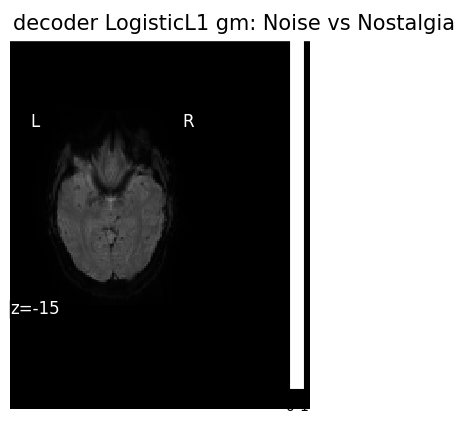

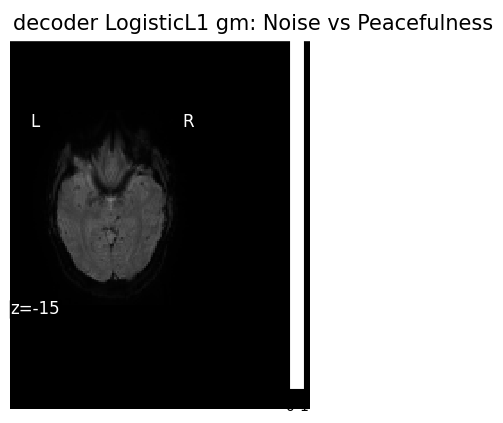

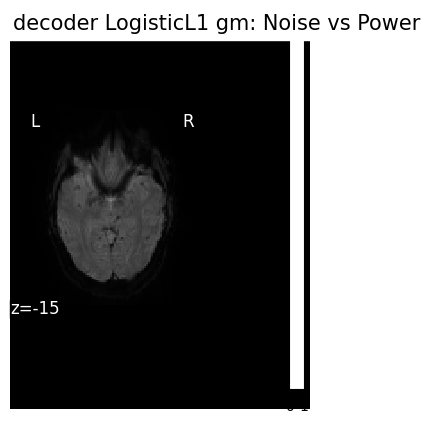

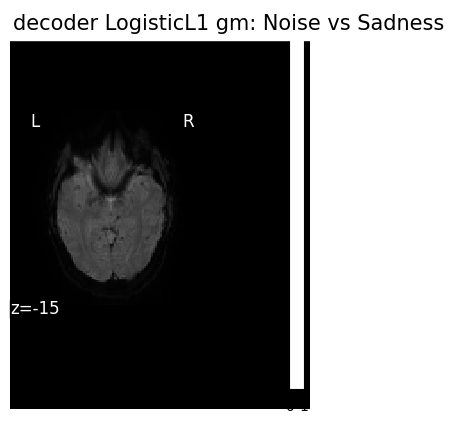

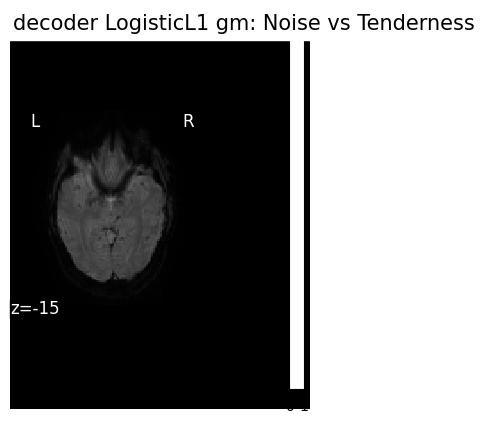

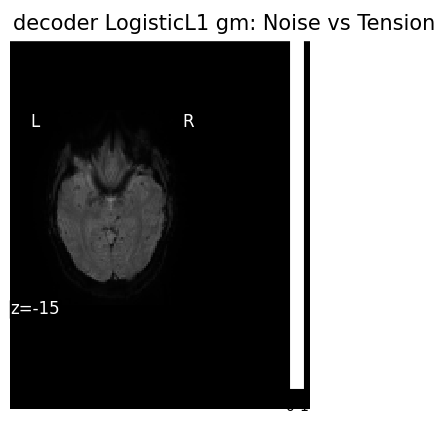

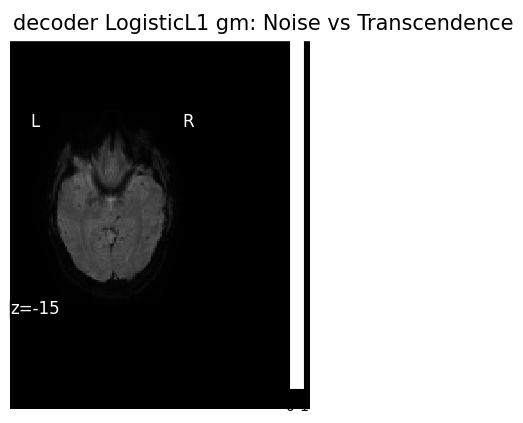

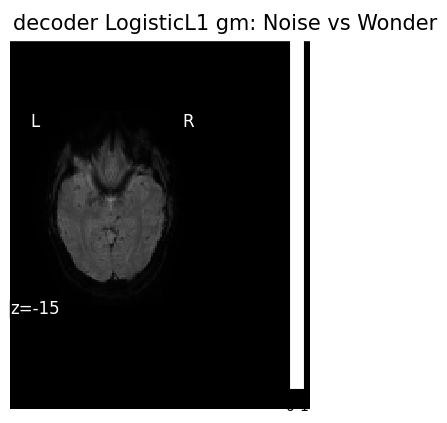

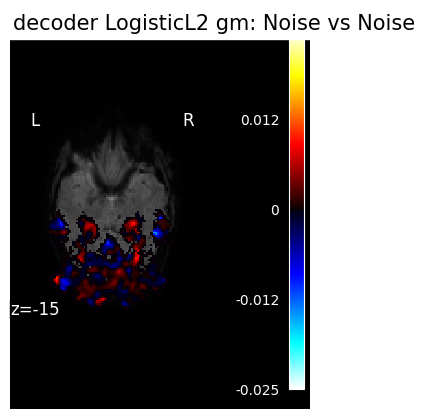

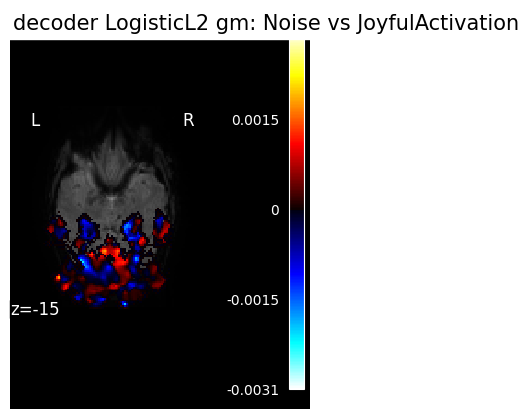

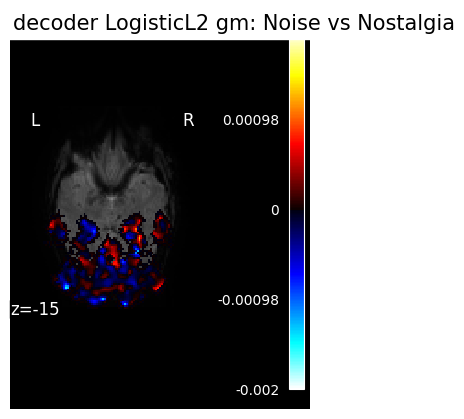

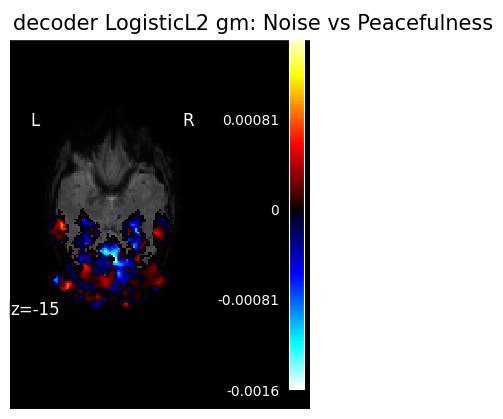

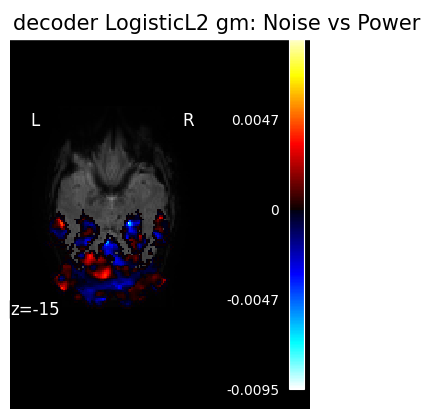

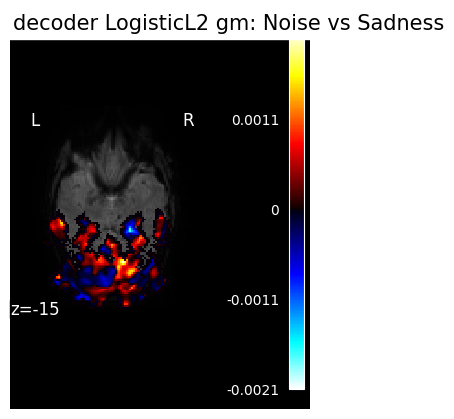

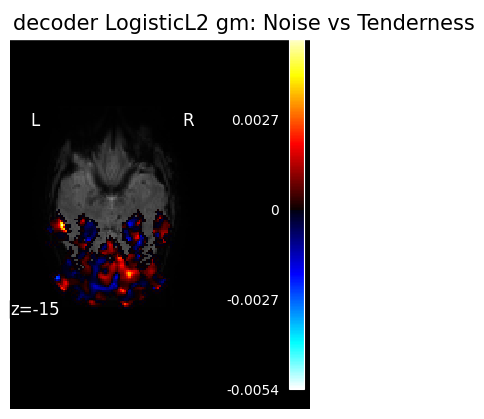

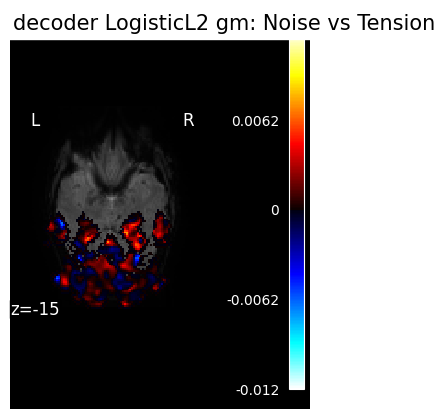

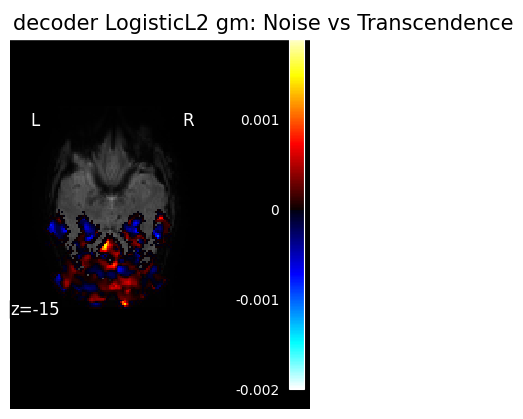

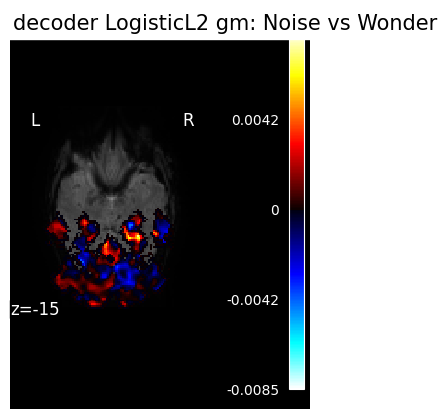

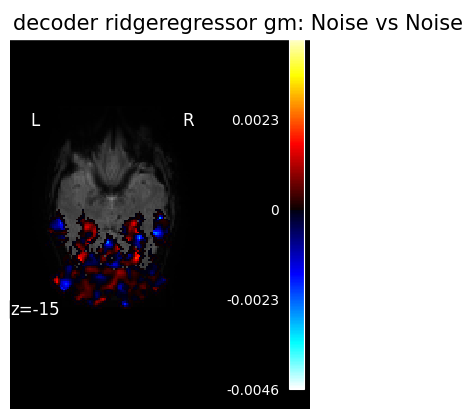

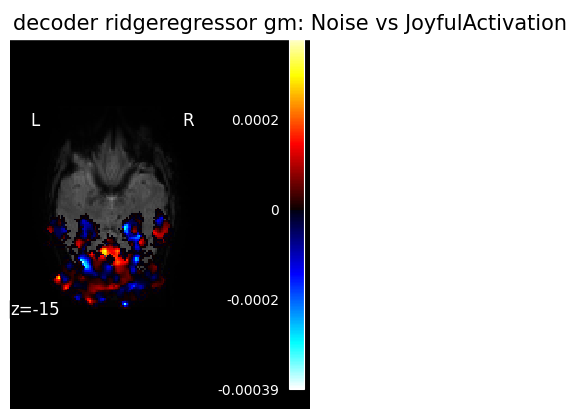

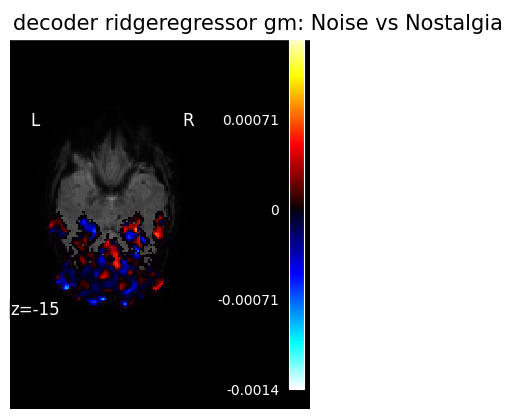

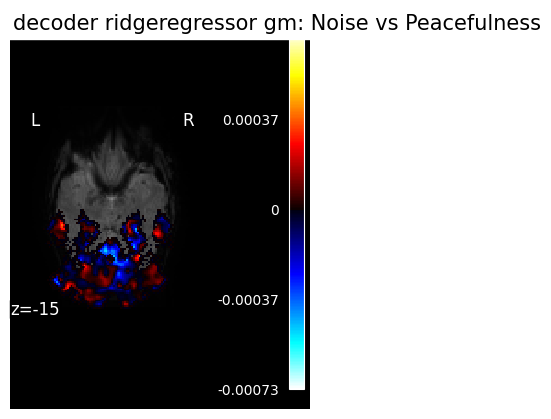

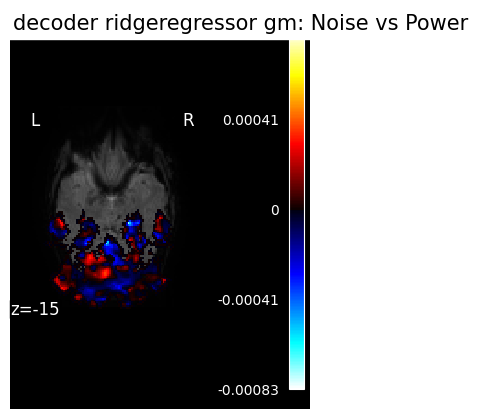

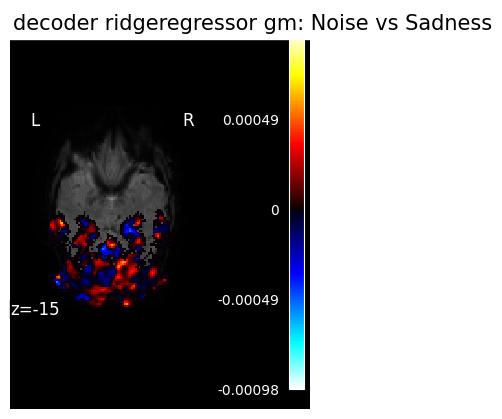

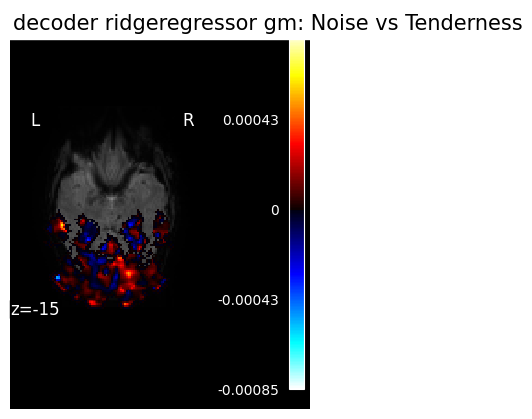

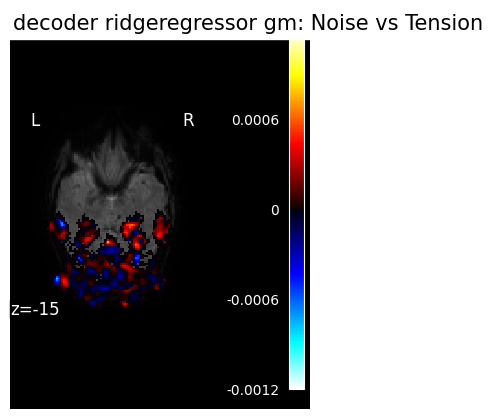

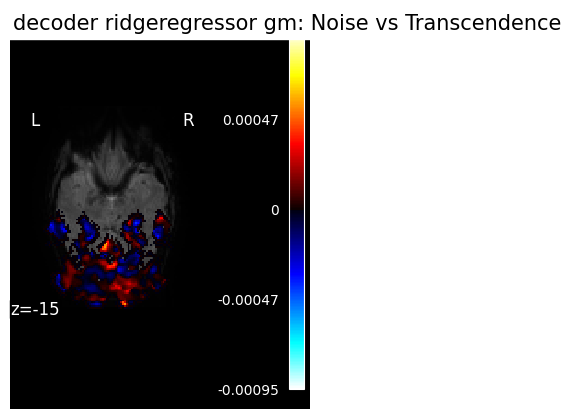

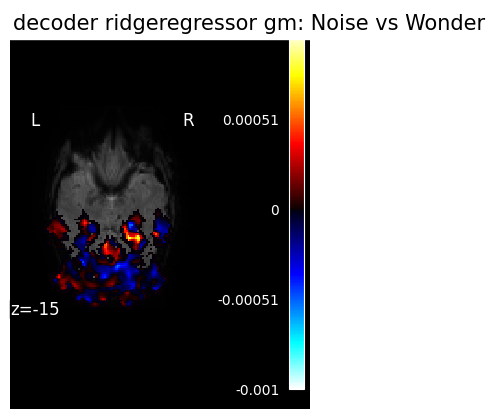

In [ ]:
from nilearn.plotting import plot_stat_map, show
from nilearn.image import get_data

mean_epi_img = mean_img(X)

for name in classifier_names[1:6]:
    
    coef_img_dict = cv_dictionary[name]["map"]
    
    # Iterate over the dictionary keys (0, 1, 2, etc.)
    for key, coef_img in coef_img_dict.items():
        print(f"Processing key {key} for classifier {name}")
        
        # Access the Nifti1Image and apply the thresholding and plotting
        threshold = np.max(np.abs(get_data(coef_img))) * 1e-3
        plot_stat_map(
            coef_img,
            bg_img=mean_epi_img,
            display_mode="z",
            cut_coords=[-15],
            threshold=threshold,
            title=f"{name.replace('_', ' ')}: Noise vs {labels[key]}",
            figure=plt.figure(figsize=(3, 4)),
        )

show()

In [ ]:
print(coef_img)

{0: <nibabel.nifti1.Nifti1Image object at 0x00000206DC3CEDF0>, 1: <nibabel.nifti1.Nifti1Image object at 0x00000206E83B5F70>, 2: <nibabel.nifti1.Nifti1Image object at 0x00000206DCA346A0>, 3: <nibabel.nifti1.Nifti1Image object at 0x00000206DD11A0D0>, 4: <nibabel.nifti1.Nifti1Image object at 0x00000207CE757A60>, 5: <nibabel.nifti1.Nifti1Image object at 0x00000206FBBBAD90>, 6: <nibabel.nifti1.Nifti1Image object at 0x00000206B9749040>, 7: <nibabel.nifti1.Nifti1Image object at 0x00000206B9749370>, 8: <nibabel.nifti1.Nifti1Image object at 0x00000206B97492B0>, 9: <nibabel.nifti1.Nifti1Image object at 0x00000206B97498B0>}


In [ ]:
from nilearn.decoding import FREMClassifier

frem_dummy_background = FREMClassifier(estimator='dummy_classifier', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_dummy_whole_brain = FREMClassifier(estimator='dummy_classifier', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_dummy_gm = FREMClassifier(estimator='dummy_classifier', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_svcL1_background = FREMClassifier(estimator='svc_l1', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_svcL1_whole_brain = FREMClassifier(estimator='svc_l1', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_svcL1_gm = FREMClassifier(estimator='svc_l1', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_svcL2_background = FREMClassifier(estimator='svc_l2', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_svcL2_whole_brain = FREMClassifier(estimator='svc_l2', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_svcL2_gm = FREMClassifier(estimator='svc_l2', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_LogisticL1_background = FREMClassifier(estimator='logistic_l1', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_LogisticL1_whole_brain = FREMClassifier(estimator='logistic_l1', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_LogisticL1_gm = FREMClassifier(estimator='logistic_l1', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_LogisticL2_background = FREMClassifier(estimator='logistic_l2', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_LogisticL2_whole_brain = FREMClassifier(estimator='logistic_l2', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_LogisticL2_gm = FREMClassifier(estimator='logistic_l2', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

frem_ridgeregressor_background = FREMClassifier(estimator='ridge_regressor', cv=logo, smoothing_fwhm=6, mask_strategy='background', verbose=0)
frem_ridgeregressor_whole_brain = FREMClassifier(estimator='ridge_regressor', cv=logo, smoothing_fwhm=6, mask_strategy='whole-brain-template', verbose=0)
frem_ridgeregressor_gm = FREMClassifier(estimator='ridge_regressor', cv=logo, smoothing_fwhm=6, mask_strategy='gm-template', verbose=0)

In [ ]:
# # Lista de classificadores
# classifiers = [
#     frem_dummy_gm,
#     frem_svcL1_gm,
#     frem_svcL2_gm,
#     frem_LogisticL1_gm,
#     frem_LogisticL2_gm,
#     frem_ridgeregressor_gm
# ]

# # Nomes dos classificadores para exibição
# classifier_names = [
#     "frem_dummy_gm",
#     "frem_svcL1_gm",
#     "frem_svcL2_gm",
#     "frem_LogisticL1_gm",
#     "frem_LogisticL2_gm",
#     "frem_ridgeregressor_gm"
# ]

# predictions = {}

# # Ajuste, predição e cálculo da acurácia para cada classificador
# for classifier, name in zip(classifiers, classifier_names):
#     classifier.fit(X, y, run_label)
#     y_pred = classifier.predict(X)
#     predictions[name] = y_pred
#     accuracy = (y_pred == y).mean() * 100.0
    
#     print(f"{name} classification accuracy: {accuracy:g}%")

## hoosing the right predictive model for neuroimaging
### Classification: two classes or multi-class
One versus One:

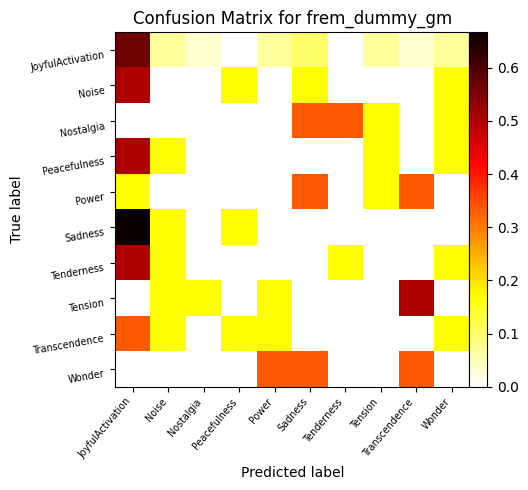

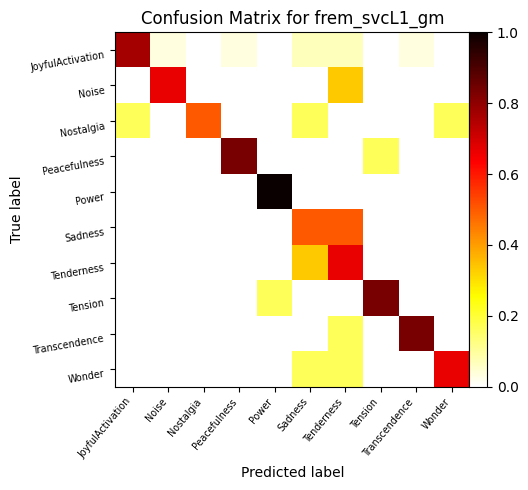

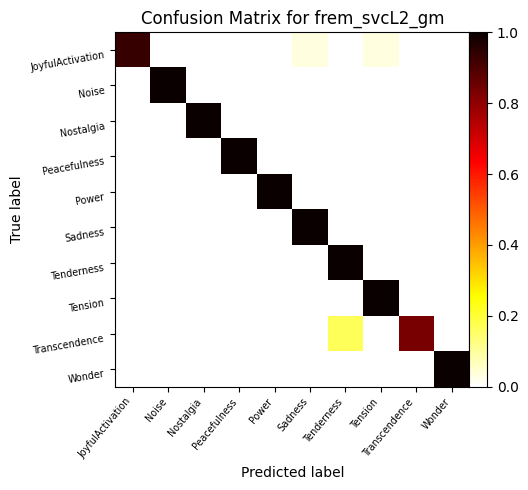

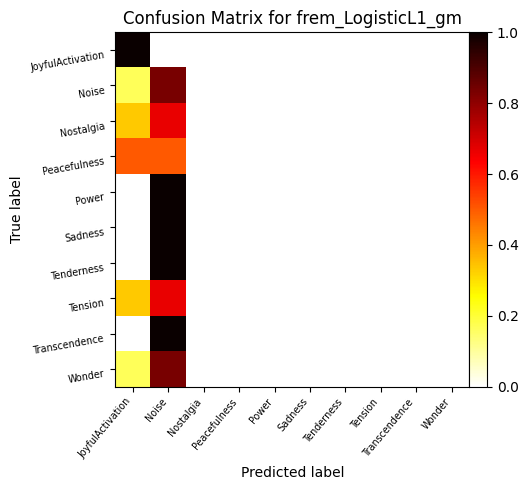

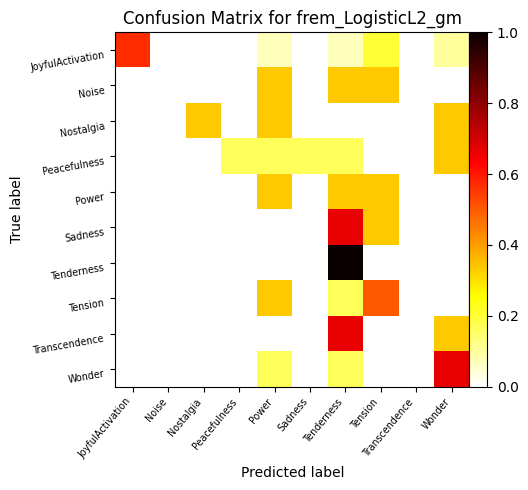

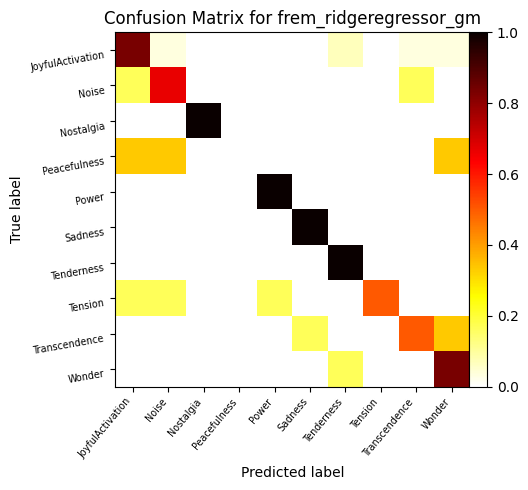

In [ ]:
from sklearn.metrics import confusion_matrix

for name in classifier_names:
    y_pred = predictions[name]
    
    # Calcular a matriz de confusão
    matrix = confusion_matrix(y, y_pred, normalize="true")
    
    # Plotar a matriz de confusão
    im = plotting.plot_matrix(
        matrix,
        labels=sorted(np.unique(labels)),
        vmin=0,
        cmap="hot_r",
    )
    
    # Adicionar rótulos aos eixos x/y
    ax = im.axes
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.set_title(f"Confusion Matrix for {name}")
    
    # Ajustar a figura para que os rótulos se encaixem
    ax.get_figure().tight_layout()
    
    # Exibir a matriz de confusão
    plotting.show()

# Decoding and MVPA: predicting from brain images

## Decoding Analysis

### Estimators
We need to use SVM's (support vector machines).
They can be _SVC_, _NuSVC_ and _LinearSVC_ !
<br>
[image.png](attachment:image.png)
<br>
We are going to use Linear Regression with L1 Regularization


### Cross validation Methods <br>
sklearn.model_selection.cross_val_score <br>
sklearn.model_selection.LeaveOneGroupOut


## Experimenting with a mask

In [ ]:
#compute a whole-brain, grey-matter or white-matter mask using the MNI template: nilearn.masking.compute_brain_mask.
import scipy
#compute a mask from images with a flat background: nilearn.masking.compute_background_mask

smooth_train = nilearn.image.smooth_img(training_runs, fwhm=6) #smooth the images with a gaussian filter
smooth_test = nilearn.image.smooth_img(testing_run.values(), fwhm=6)


NameError: name 'training_runs' is not defined